# Belastingen uit matroos

## 1. Voorbeeld met CSV
Lees de configuratie in:

Dit leest een configuratie bestand `belasting_noos_matroos_config.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48]  

    csv:
        delimiter: ","

    LoadsMatroos:
        website: "noos"
        source: "observed"
        parameters: ["waterlevel"]
        MISSING_VALUE: 999


DataAdapter: 
    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [1]:
from pathlib import Path

from toolbox_continu_inzicht import Config

test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_noos_matroos_config.yaml")
c.lees_config()

Zet de data adapter klaar en geef deze de configuratie mee 

In [2]:
from toolbox_continu_inzicht import DataAdapter

data = DataAdapter(config=c)

Run de module met CSV

In [3]:
from toolbox_continu_inzicht.loads import LoadsMatroos

matroos = LoadsMatroos(
    data_adapter=data, input="BelastingLocaties", output="Waterstanden"
)

In [4]:
matroos.df_in

In [5]:
ds = await matroos.run()

In [6]:
df = matroos.df_out

In [7]:
df_plot = df[df["objectid"] == "hoekvanholland"]

In [8]:
import numpy as np

from toolbox_continu_inzicht.utils.datetime_functions import datetime_from_epoch

values_nan = df_plot[df_plot["value"] == 999].index
for val in values_nan:
    df_plot.loc[val, "value"] = np.nan

df_plot = df_plot.set_index(df_plot["datetime"].apply(lambda x: datetime_from_epoch(x)))

<Axes: xlabel='datetime'>

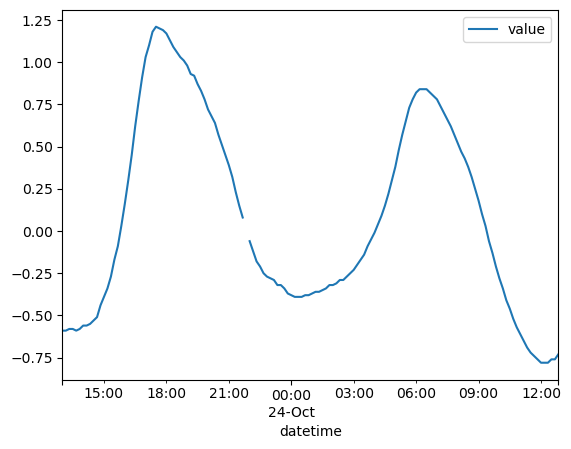

In [9]:
df_plot[["value"]].plot()

### Dit waren alleen metingen, herhaal nu met dataset met ook voorspellingen

Dit leest een configuratie bestand `belasting_noos_matroos_config_fcst.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48]  

    csv:
        delimiter: ","

    LoadsMatroos:
        website: "noos"
        source: "dcsm6_kf"
        parameters: ["waterlevel"]
        MISSING_VALUE: 999


DataAdapter: 
    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [10]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_noos_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

matroos_fsct = LoadsMatroos(
    data_adapter=data, input="BelastingLocaties", output="Waterstanden"
)

In [11]:
await matroos_fsct.run()

In [12]:
df_fcst = matroos_fsct.df_out
df_plot_fcst = df_fcst[df_fcst["objectid"] == "hoekvanholland"]
values_nan = df_plot_fcst[df_plot_fcst["value"] == 999].index
for val in values_nan:
    df_plot_fcst.loc[val, "value"] = np.nan

df_plot_fcst = df_plot_fcst.set_index(
    df_plot_fcst["datetime"].apply(lambda x: datetime_from_epoch(x))
)

<Axes: xlabel='datetime'>

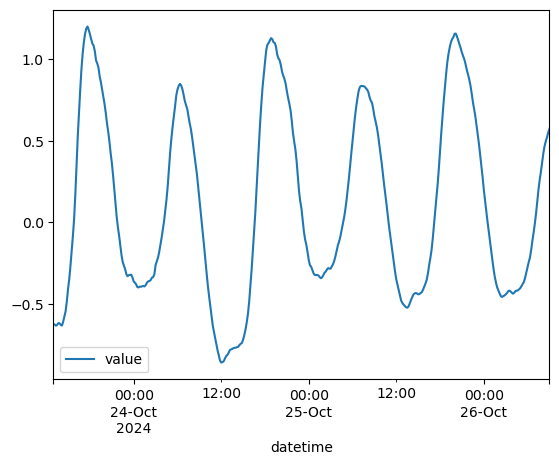

In [13]:
df_plot_fcst[["value"]].plot()

##### vergelijk de twee 

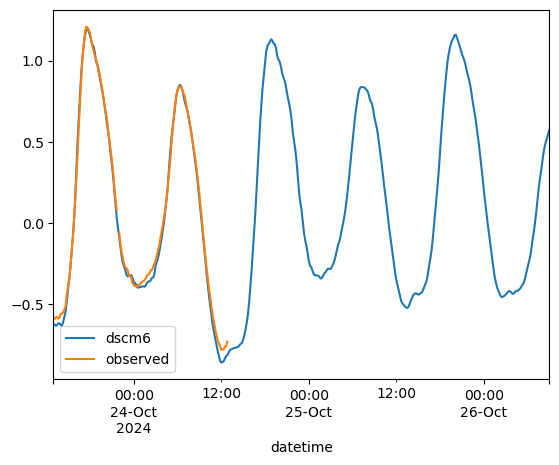

In [14]:
ax = df_plot_fcst[["value"]].plot()
df_plot[["value"]].plot(ax=ax)
ax.legend(["dscm6", "observed"]);

#### werkt ook met vitaal.matroos.rws
werkt alleen als je in de `.env` username & password mee geeft
```yaml
vitaal_user: "..."
vitaal_password: "..."
```

en de website aanpassen

```yaml
LoadsMatroos:
        website: "vitaal" 


```

In [15]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_vitaal_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

vitaal_fsct = LoadsMatroos(
    data_adapter=data, input="BelastingLocaties", output="Waterstanden"
)

In [16]:
await vitaal_fsct.run()

In [17]:
df_vitaal_fcst = vitaal_fsct.df_out
df_plot_vitaal = df_vitaal_fcst[df_vitaal_fcst["objectid"] == "hoekvanholland"]
values_nan = df_plot_vitaal[df_plot_vitaal["value"] == 999].index
for val in values_nan:
    df_plot_vitaal.loc[val, "value"] = np.nan

df_plot_vitaal = df_plot_vitaal.set_index(
    df_plot_vitaal["datetime"].apply(lambda x: datetime_from_epoch(x))
)

in dit geval indentiek:

<Axes: xlabel='datetime'>

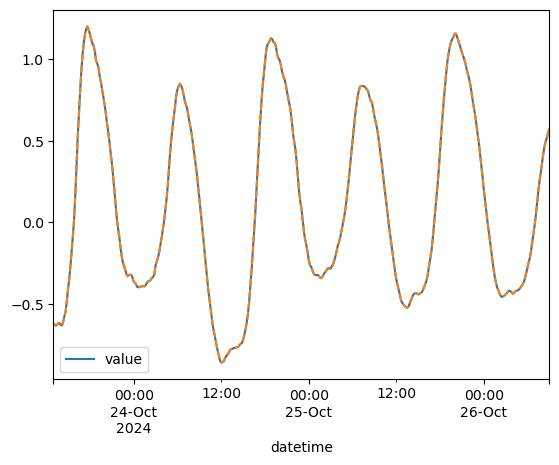

In [18]:
ax = df_plot_fcst[["value"]].plot()
df_plot_vitaal["value"].plot(ls="--", ax=ax)

In [1]:
from toolbox_continu_inzicht.loads import get_matroos_locations

In [2]:
gdf = await get_matroos_locations(parameter="waterlevel", source="dcsm6_kf")

In [6]:
gdf

,geometry,object_id,meetlocatie_naam
0,POINT Z (3.81011 55.39894 0),511,A121
1,POINT Z (-2.07333 57.14333 0),38,Aberdeen
2,POINT Z (0.78556 57.26056 0),111,anasuria
3,POINT Z (3.29 51.36278 0),2160,appelzak
4,POINT Z (2.06556 56.39972 0),48,Aukfield platform
...,...,...,...
176,POINT Z (6.65388 53.56998 0),1879,Eemsboei 17
177,POINT Z (6.79509 53.50673 0),1880,Eemsboei 27
178,POINT Z (6.83702 53.48027 0),1881,Eemsboei 30
179,POINT Z (7.00684 53.32695 0),1882,Eemsboei 51


In [10]:
from toolbox_continu_inzicht.loads.loads_matroos.get_matroos_locations import (
    get_matroos_sources,
)

In [11]:
df = await get_matroos_sources()